In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install missingno
import missingno as msno
%pip install fancyimpute
from fancyimpute import IterativeImputer, KNN


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the dataset
path = '/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv'
merged_data = pd.read_csv(path, na_values=('-','NaN','','nan'))
df_merged_data = pd.DataFrame(merged_data)


print(df_merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9737 entries, 0 to 9736
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Datum                  9737 non-null   object 
 1   Inflationsrate         8308 non-null   float64
 2   Heimspiel              9737 non-null   float64
 3   Weihnachtsmarkt        9737 non-null   float64
 4   Markt                  9737 non-null   float64
 5   Faehrverkaehr          8308 non-null   object 
 6   Kreuzfahrverkehr       8308 non-null   float64
 7   Temperatur             9708 non-null   float64
 8   Monat                  9708 non-null   float64
 9   Jahreszeit             9708 non-null   object 
 10  Frühling               9708 non-null   float64
 11  Sommer                 9708 non-null   float64
 12  Herbst                 9708 non-null   float64
 13  Winter                 9708 non-null   float64
 14  Temp_warm              9708 non-null   float64
 15  Temp

### Visualization of Missing Data

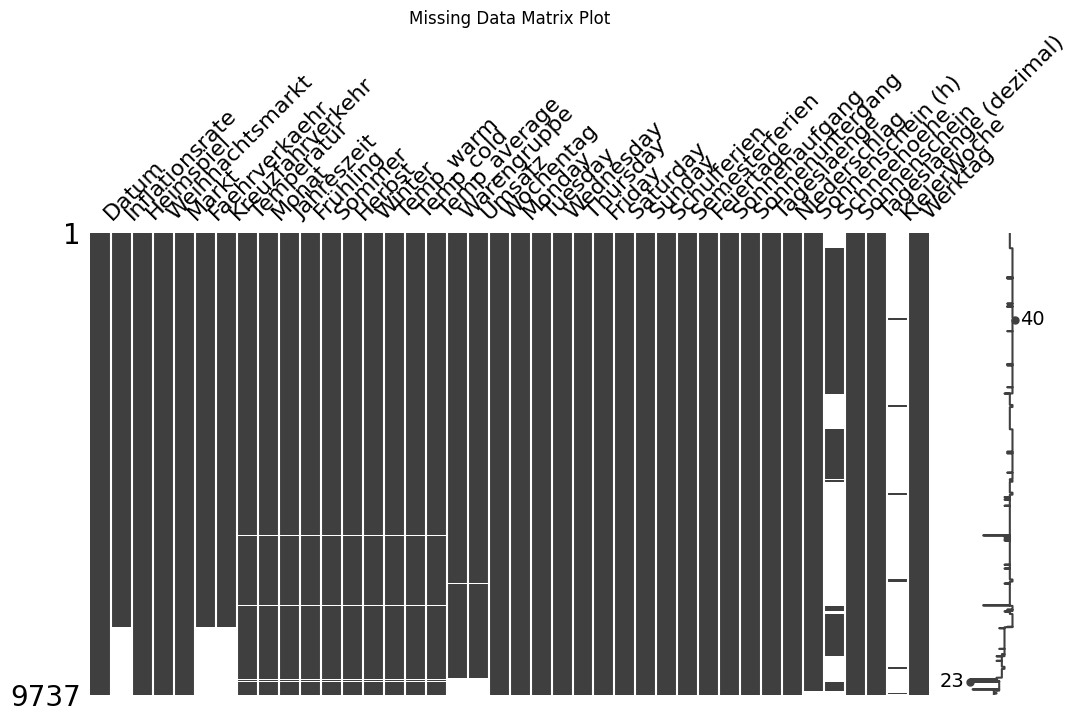

In [4]:
# Matrix plot of missing data
msno.matrix(df_merged_data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

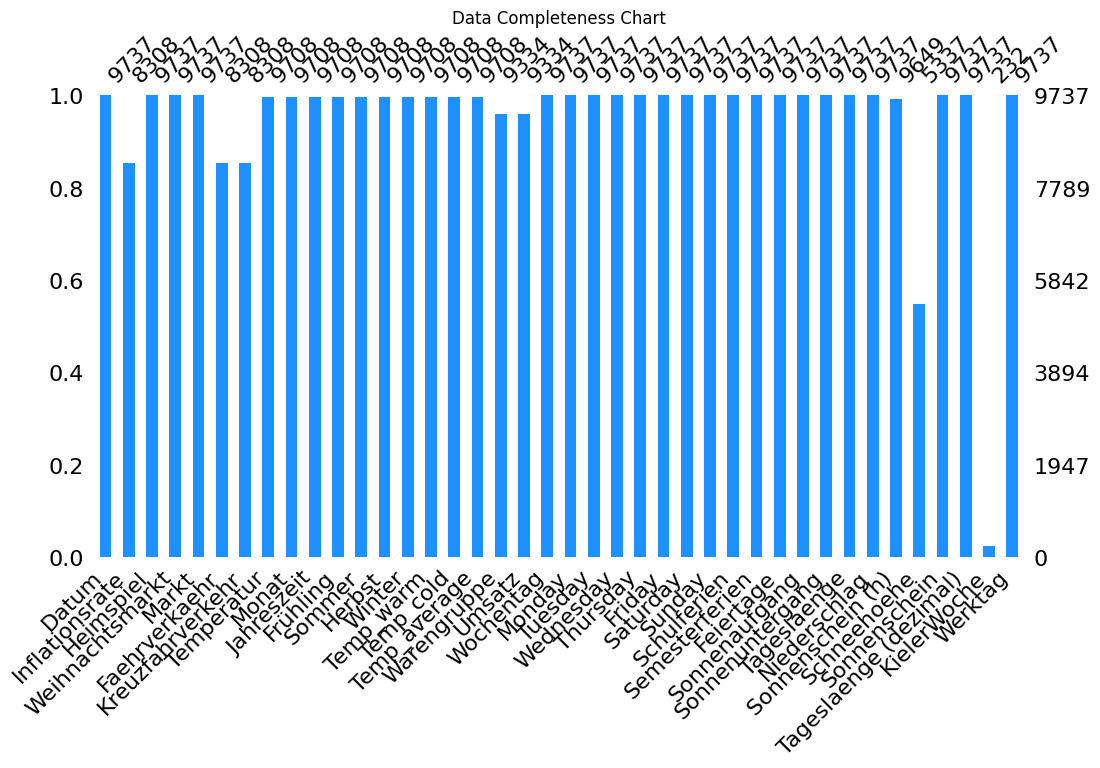

In [5]:
# Bar plot of complete data
msno.bar(df_merged_data, color="dodgerblue", figsize=(12, 6))
plt.title('Data Completeness Chart')
plt.show()

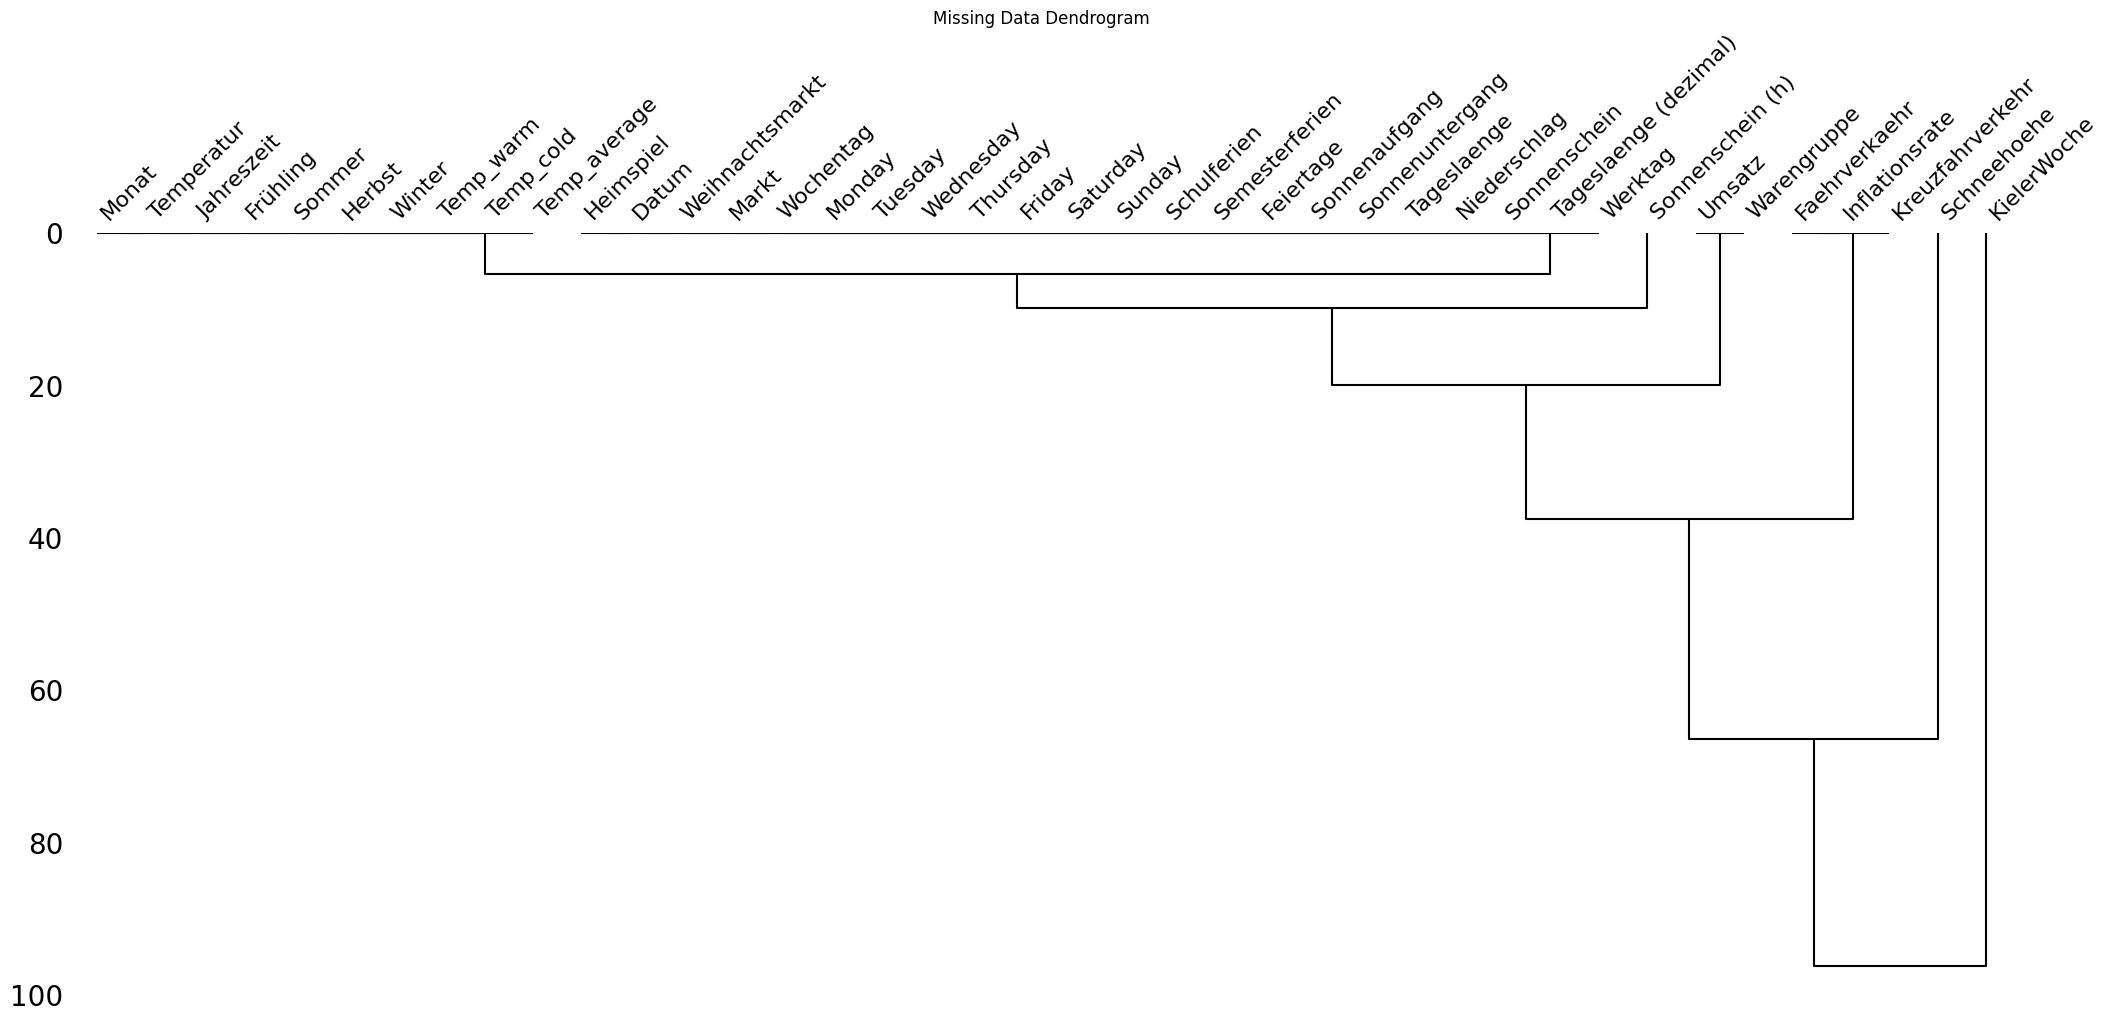

In [6]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(df_merged_data)
plt.title('Missing Data Dendrogram')
plt.show()

### Imputation of Missing Data

In [7]:
# Create a mask for the imputed values
df_merged_data_reduced=df_merged_data.drop(['Datum', 'Faehrverkaehr', 'Jahreszeit', 'Wochentag', 'Sonnenaufgang', 'Sonnenuntergang', 'Tageslaenge'], axis=1)

mask = df_merged_data_reduced.isna()  # mask for missing values in 'Ozone'

In [9]:
# KNN imputation
#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','KielerWoche','Werktag'
imputer_knn = KNN()
airquality_knn = pd.DataFrame(imputer_knn.fit_transform(df_merged_data_reduced), columns=df_merged_data_reduced.columns)


Imputing row 1/9737 with 2 missing, elapsed time: 15.241
Imputing row 101/9737 with 2 missing, elapsed time: 15.250
Imputing row 201/9737 with 2 missing, elapsed time: 15.259
Imputing row 301/9737 with 2 missing, elapsed time: 15.267
Imputing row 401/9737 with 1 missing, elapsed time: 15.271
Imputing row 501/9737 with 1 missing, elapsed time: 15.273
Imputing row 601/9737 with 1 missing, elapsed time: 15.276
Imputing row 701/9737 with 1 missing, elapsed time: 15.278
Imputing row 801/9737 with 1 missing, elapsed time: 15.280
Imputing row 901/9737 with 1 missing, elapsed time: 15.282
Imputing row 1001/9737 with 1 missing, elapsed time: 15.285
Imputing row 1101/9737 with 1 missing, elapsed time: 15.287
Imputing row 1201/9737 with 1 missing, elapsed time: 15.289
Imputing row 1301/9737 with 1 missing, elapsed time: 15.292
Imputing row 1401/9737 with 1 missing, elapsed time: 15.294
Imputing row 1501/9737 with 1 missing, elapsed time: 15.296
Imputing row 1601/9737 with 1 missing, elapsed time:

In [10]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(df_merged_data_reduced), columns=df_merged_data_reduced.columns)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


### Visualization of Imputed Data

In [21]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -20
    x_max = 100
    y_min = 50
    y_max = 100
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


In [22]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(df_merged_data_reduced, airquality_knn, 'KielerWoche','Monday', mask, 'KNN Imputation Scatter Plot','KielerWoche','Monday')


ValueError: Cannot index with multidimensional key

<Figure size 1000x600 with 0 Axes>

In [23]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality, airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

NameError: name 'airquality' is not defined

### Correlation Analysis

In [25]:
print("Correlation in original data:", df_merged_data_reduced['Niederschlag'].corr(df_merged_data_reduced['Temperatur'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Niederschlag'].corr(airquality_knn['Temperatur']))
print("Correlation after IRMI:", airquality_irmi['Niederschlag'].corr(airquality_irmi['Temperatur']))

Correlation in original data: -0.02291858263423717
Correlation after KNN imputation: -0.019489695394819644
Correlation after IRMI: -0.0228646479475805
